# Introduction 

For the purpose of this project, the following questions will be explored:

What are typical wind conditions at Irish airports?

Airports that will be looked at in this project:

Dublin (DUB)

Shannon (SNN)

Cork (ORK)

Knock (NOC)


## Aquiring the datasets.

Import Libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read in the CSV Files for the four airports and name the dataframes accordingly. Skip Meta data using skiprows and format. Parse the first column as date and set it as the index. Format the date as well for readability.

In [3]:
# Load the Shannon airport dataset.

shannon = pd.read_csv("data/dly518.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%Y %H:%M')


In [4]:
# load the Dublin airport dataset.

dublin = pd.read_csv("data/dly532.csv", parse_dates=["date"], index_col='date', skiprows=25, low_memory=False, date_format='%d-%b-%Y %H:%M')

In [5]:
# Load the Cork airport dataset.

cork = pd.read_csv("data/dly3904.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%Y %H:%M')

In [6]:
# Load the Knock airport dataset.

knock = pd.read_csv("data/dly4935.csv", parse_dates=["date"], index_col='date', skiprows=24, low_memory=False, date_format='%d-%b-%Y %H:%M')

Check the datasets load correctly by checking the first few rows. 

In [7]:
shannon.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Sept-45,0,19.2,0,14.4,0,13.6,0,0.2,1013.8,12.0,...,0,27,1.6,0,,1.6,2.3,,,
02-Sept-45,0,20.7,0,14.8,0,13.4,3,0.0,1018.2,7.3,...,0,16,9.3,0,,2.5,3.5,,,
03-Sept-45,0,23.3,0,11.8,0,9.6,3,0.0,1021.2,4.2,...,0,12,11.4,0,,2.9,3.9,,,
04-Sept-45,0,21.6,0,9.4,0,6.7,3,0.0,1024.2,6.2,...,0,18,5.3,0,,2,2.7,,,
05-Sept-45,0,21.3,0,12.2,0,11.3,3,0.0,1024.9,4.9,...,0,13,3.6,0,,1.8,2.4,,,


In [8]:
dublin.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Jan-42,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,17.2,...,,0.0,0,,,1.1,1.4,,,
02-Jan-42,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,15.2,...,,0.0,0,,,0.7,0.9,,,
03-Jan-42,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,14.0,...,,0.1,0,,,0.5,0.6,,,
04-Jan-42,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,17.0,...,,0.6,0,,,0.6,0.7,,,
05-Jan-42,0,3.5,1,-0.8,0,0,0,0.6,1013.4,13.0,...,,3.4,0,,,0.6,0.7,,,


In [9]:
cork.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Jan-62,0,2.8,1,-2.5,,,8,,999.6,9.2,...,0,24,,0,,,,,,
02-Jan-62,0,2.8,1,-3.7,,,8,,1005.8,5.9,...,0,10,,0,,,,,,
03-Jan-62,0,2.3,1,-3.8,,,8,,1007.8,6.7,...,0,13,,0,,,,,,
04-Jan-62,0,6.6,0,0.6,,,8,,1007.8,4.5,...,0,12,,0,,,,,,
05-Jan-62,0,9.3,0,0.6,,,8,,1002.2,12.7,...,0,29,,0,,,,,,


In [10]:
knock.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Aug-96,4,,4,,,,8,,,,...,1,,1.1,0,,,,,,
02-Aug-96,0,15.1,0,9.2,,,0,0.3,999.2,7.7,...,0,18,,0,,,,,,
03-Aug-96,0,18,0,11.6,0,11.4,0,0,1002.1,6.6,...,0,18,5.7,0,15.6,2.7,3.7,2.7,2.7,2.7
04-Aug-96,0,20.4,0,9.6,0,8.6,0,0.1,991.7,11.3,...,0,32,6.8,0,15.975,3.7,5,6.2,6.2,6.3
05-Aug-96,0,13.7,0,8.7,0,10.9,0,13.3,983.8,7.8,...,0,24,0,0,14.625,1.1,1.8,0,-6.1,-5.9


## Cleaning the datasets.

There is missing values in some of the columns. Replace these with NaN objects.

In [11]:
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

shannon.replace(to_replace=' ', value=np.nan, inplace=True)

# Check.

 # shannon.head()

In [12]:
dublin.replace(to_replace=' ', value=np.nan, inplace=True)
# dublin.head()

In [13]:
cork.replace(to_replace=' ', value=np.nan, inplace=True)
# cork.head() 

In [14]:
knock.replace(to_replace=' ', value=np.nan, inplace=True)
# knock.head()

For the purpose of this project, will be looking at the following columns for analysis.


__'wdsp:'   -  Mean Wind Speed (knot)__

__'hm:'    -  Highest ten minute mean wind speed (knot)__

__'ddhm:'   -  Wind Direction at max 10 min. mean (deg)__

__'hg: '   -  Highest Gust (knot)__

First, drop any rows that are missing values.

In [15]:
# Drop rows missing values in 'wdsp' column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

# Shannon.

shannon_mean_wind_speed = shannon[['wdsp']].copy()
shannon_mean_wind_speed.isna().sum()

shannon_mean_wind_speed.dropna(inplace=True)
shannon_mean_wind_speed.isna().sum()
# Dublin.

dublin_mean_wind_speed = dublin[['wdsp']].copy()
dublin_mean_wind_speed.isna().sum()

dublin_mean_wind_speed.dropna(inplace=True)
dublin_mean_wind_speed.isna().sum()

# Cork.

cork_mean_wind_speed = cork[['wdsp']].copy()
cork_mean_wind_speed.isna().sum()

cork_mean_wind_speed.dropna(inplace=True)
cork_mean_wind_speed.isna().sum()  
# Knock.

knock_mean_wind_speed = knock[['wdsp']].copy()
knock_mean_wind_speed.isna().sum()

knock_mean_wind_speed.dropna(inplace=True)
knock_mean_wind_speed.isna().sum()

wdsp    0
dtype: int64

In [16]:
# Drop rows missing values in 'hm' column.

# Shannon.

shannon_max_wind_speed = shannon[['hm']].copy()
shannon_max_wind_speed.isna().sum()

shannon_max_wind_speed.dropna(inplace=True)
shannon_max_wind_speed.isna().sum()

# Check.
shannon_max_wind_speed.head()

# Dublin.

dublin_max_wind_speed = dublin[['hm']].copy()
dublin_max_wind_speed.isna().sum()
dublin_max_wind_speed.dropna(inplace=True)
dublin_max_wind_speed.isna().sum()
# dublin_max_wind_speed.head()

# Cork.

cork_max_wind_speed = cork[['hm']].copy()
cork_max_wind_speed.isna().sum()
cork_max_wind_speed.dropna(inplace=True)
cork_max_wind_speed.isna().sum()
# cork_max_wind_speed.head()

# Knock.

knock_max_wind_speed = knock[['hm']].copy()
knock_max_wind_speed.isna().sum() 
knock_max_wind_speed.dropna(inplace=True)
knock_max_wind_speed.isna().sum()
# knock_max_wind_speed.head()

hm    0
dtype: int64

In [17]:
# Drop rows missing values in 'ddhm' column.

# Shannon.

shannon_mean_wind_direction = shannon[['ddhm']].copy()
shannon_mean_wind_direction.isna().sum()
shannon_mean_wind_direction.dropna(inplace=True)
shannon_mean_wind_direction.isna().sum()

# Dublin.

dublin_mean_wind_direction = dublin[['ddhm']].copy()
dublin_mean_wind_direction.isna().sum()
dublin_mean_wind_direction.dropna(inplace=True)
dublin_mean_wind_direction.isna().sum()

# Cork.
cork_mean_wind_direction = cork[['ddhm']].copy()
cork_mean_wind_direction.isna().sum()
cork_mean_wind_direction.dropna(inplace=True)
cork_mean_wind_direction.isna().sum()

# Knock.

knock_mean_wind_direction = knock[['ddhm']].copy()
knock_mean_wind_direction.isna().sum()
knock_mean_wind_direction.dropna(inplace=True)
knock_mean_wind_direction.isna().sum()


ddhm    0
dtype: int64

In [18]:
# Drop rows missing values in 'hg' column.

# Shannon.

shannon_max_gust_speed = shannon[['hg']].copy()
shannon_max_gust_speed.isna().sum()
shannon_max_gust_speed.dropna(inplace=True)
shannon_max_gust_speed.isna().sum()


# Dublin.
dublin_max_gust_speed = dublin[['hg']].copy()
dublin_max_gust_speed.isna().sum()
dublin_max_gust_speed.dropna(inplace=True)
dublin_max_gust_speed.isna().sum()


# Cork.
cork_max_gust_speed = cork[['hg']].copy()
cork_max_gust_speed.isna().sum()
cork_max_gust_speed.dropna(inplace=True)
cork_max_gust_speed.isna().sum()


# Knock.
knock_max_gust_speed = knock[['hg']].copy()
knock_max_gust_speed.isna().sum()
knock_max_gust_speed.dropna(inplace=True)
knock_max_gust_speed.isna().sum()


hg    0
dtype: int64

Drop the unwanted columns and rename the ones being kept to improve readability.

In [19]:
# Drop unnecessary columns and rename. 
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

shannon = shannon[['wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
    'wdsp': 'Mean_Wind_Speed(knots)', 
    'hm': 'Max_Wind_Speed(knots)', 
    'ddhm': 'Mean_Wind_Direction(degrees)', 
    'hg': 'Max_Gust_Speed(knots)'})    

# Check.

shannon.head()

,Mean_Wind_Speed(knots),Max_Wind_Speed(knots),Mean_Wind_Direction(degrees),Max_Gust_Speed(knots)
date,,,,
01-Sept-45,12.0,20,90,27
02-Sept-45,7.3,12,100,16
03-Sept-45,4.2,8,100,12
04-Sept-45,6.2,13,310,18
05-Sept-45,4.9,9,100,13


In [20]:
dublin = dublin[['wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
    'wdsp': 'Mean_Wind_Speed(knots)', 
    'hm': 'Max_Wind_Speed(knots)', 
    'ddhm': 'Mean_Wind_Direction(degrees)', 
    'hg': 'Max_Gust_Speed(knots)'})    

# dublin.head()

In [21]:
cork = cork[['wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
    'wdsp': 'Mean_Wind_Speed(knots)', 
    'hm': 'Max_Wind_Speed(knots)', 
    'ddhm': 'Mean_Wind_Direction(degrees)', 
    'hg': 'Max_Gust_Speed(knots)'})    

# cork.head()

In [22]:
knock = knock[['wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
    'wdsp': 'Mean_Wind_Speed(knots)',
    'hm': 'Max_Wind_Speed(knots)',
    'ddhm': 'Mean_Wind_Direction(degrees)',
    'hg': 'Max_Gust_Speed(knots)'})

# knock.head()

Combine the four airport datasets into one Dataframe to create comparrison plots. Need to create a Column for the airport names to be stored. This can be acheived using pandas.concat. It will take the multiple dataframes and stick them together.

In [23]:
# Store the four airport DataFrames into a single DF. Adsd an Airport column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

all_airports = pd.concat([
    shannon.assign(Airport='Shannon'),
    dublin.assign(Airport='Dublin'),
    cork.assign(Airport='Cork'),
    knock.assign(Airport='Knock')
], axis=0)

# Move Airport column to front for readability.
# See: https://stackoverflow.com/questions/21415661/pandas-move-column-to-first-position-in-dataframe

all_airports = all_airports[['Airport'] + [c for c in all_airports.columns if c != 'Airport']]

# Check
all_airports.head()


,Airport,Mean_Wind_Speed(knots),Max_Wind_Speed(knots),Mean_Wind_Direction(degrees),Max_Gust_Speed(knots)
date,,,,,
01-Sept-45,Shannon,12.0,20,90,27
02-Sept-45,Shannon,7.3,12,100,16
03-Sept-45,Shannon,4.2,8,100,12
04-Sept-45,Shannon,6.2,13,310,18
05-Sept-45,Shannon,4.9,9,100,13


## Investigating / Analysising Data

__Histogram of Mean Wind Speed__

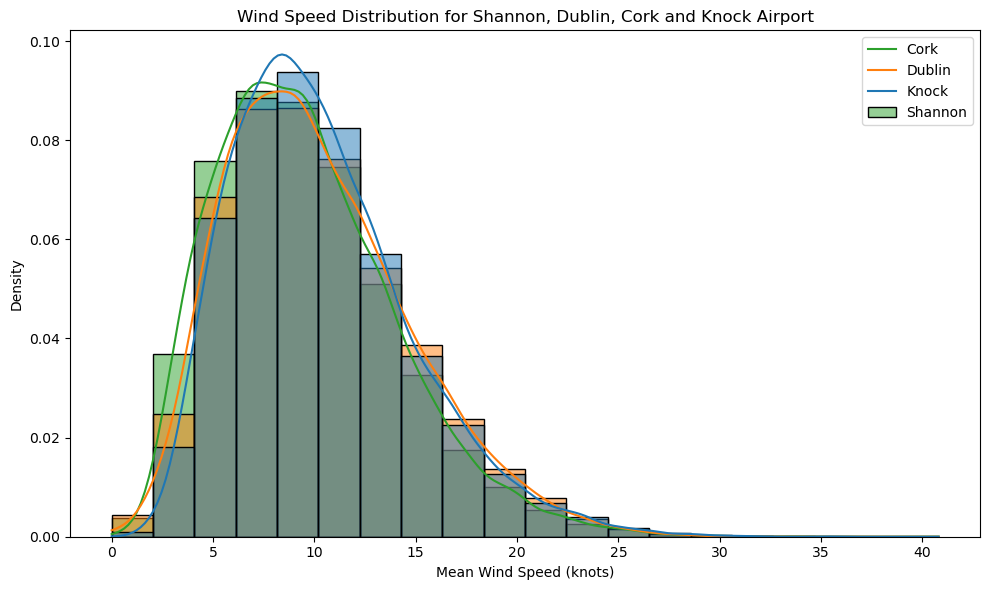

In [ ]:
# Plot Histogram of Mean Wind Speed for All Airports
 

wind_speeds = all_airports.pivot(columns='Airport', values='Mean_Wind_Speed(knots)')


plt.figure(figsize=(10, 6))
sns.histplot(data=wind_speeds, bins=20, kde=True, stat="density", common_norm=False)
plt.title('Wind Speed Distribution for Shannon, Dublin, Cork and Knock Airport')
plt.xlabel('Mean Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(wind_speeds.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Speed_Distribution_All_Airports.png')

plt.show()

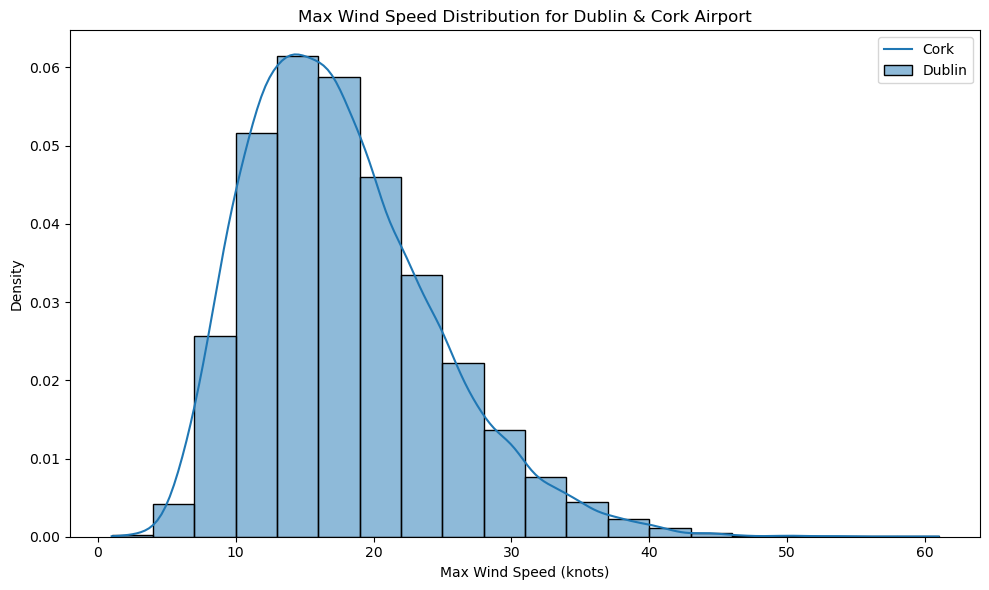

In [ ]:
# Plot histogram of Max Wind Speed for All Airports

max_wind_speeds = all_airports.pivot(columns='Airport', values='Max_Wind_Speed(knots)')

plt.figure(figsize=(10, 6))
sns.histplot(data=max_wind_speeds, bins=20, kde=True, stat="density", common_norm=False)
plt.title('Max Wind Speed Distribution for Dublin & Cork Airport') 
plt.xlabel('Max Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(max_wind_speeds.columns)
plt.tight_layout()

# plt.savefig('Max_Wind_Speed_Distribution_Dublin_Cork_Airports.png')

plt.show()

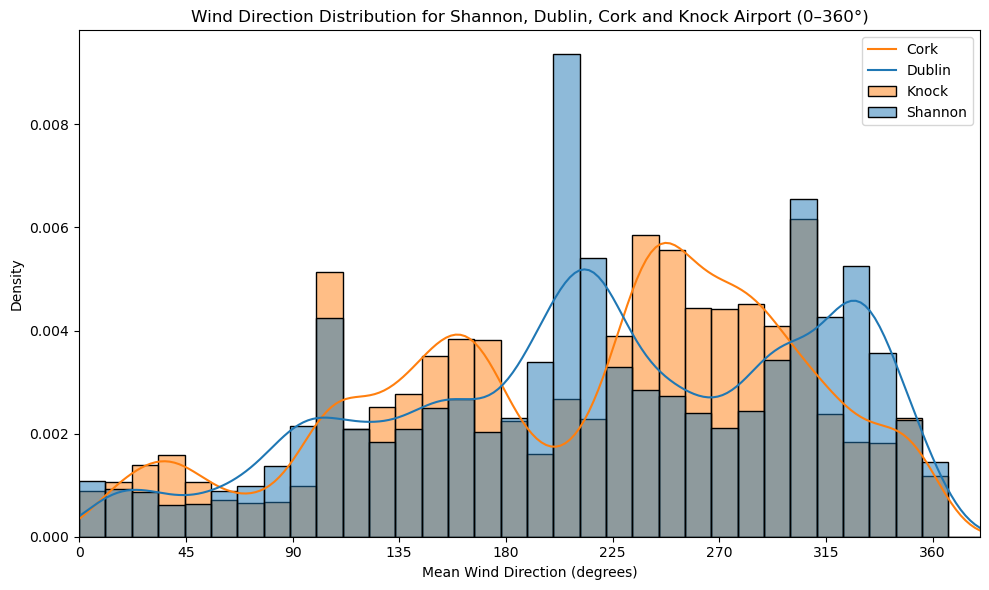

In [ ]:
# Plot histogram of Mean Wind Direction(degrees) for All Airports

wind_directions = all_airports.pivot(
    columns='Airport',
    values='Mean_Wind_Direction(degrees)'
)

plt.figure(figsize=(10, 6))

sns.histplot(data=wind_directions, bins=36, kde=True, stat="density", common_norm=False)

plt.title('Wind Direction Distribution for Shannon, Dublin, Cork and Knock Airport (0–360°)')
plt.xlabel('Mean Wind Direction (degrees)')
plt.ylabel('Density')

# Extending x-axis slightly beyond 360 to accommodate tick marks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(0, 380) 

# Set x-ticks from 0 to 360 at intervals of 45 degrees so easier to read.

plt.xticks(range(0, 361, 45)) 

plt.legend(wind_directions.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Direction_Distribution_All_Airports.png')

plt.show()


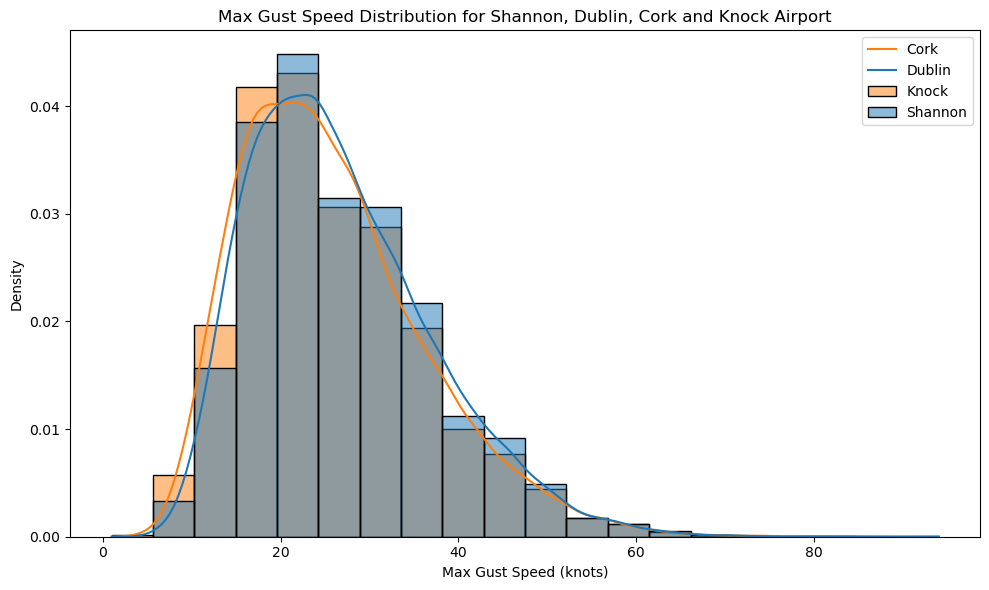

In [ ]:
# Plot histogram of Max Gust Speed for All Airports

max_gust_speeds = all_airports.pivot(columns='Airport', values='Max_Gust_Speed(knots)')
plt.figure(figsize=(10, 6))
sns.histplot(data=max_gust_speeds, bins=20, kde=True, stat="density", common_norm=False)
plt.title('Max Gust Speed Distribution for Shannon, Dublin, Cork and Knock Airport')
plt.xlabel('Max Gust Speed (knots)')
plt.ylabel('Density')
plt.legend(max_gust_speeds.columns)
plt.tight_layout()

# plt.savefig('Max_Gust_Speed_Distribution_All_Airports.png')

plt.show()
